# Priorizo educacion y me fijo el area de las postulaciones por nivel educativo

se puede hacer variantes como la educacion maxima alcanzada, para ello solo se ordena por id y prioridad_nom y nos quedamos con el primero por cada idpostulante. 


In [2]:
#importaciones
from IPython.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
import datetime
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
df_post_gen_age = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv")
df_post_gen_age["fechanacimiento"] = pd.to_datetime(df_post_gen_age["fechanacimiento"], errors="coerce")
df_post_gen_age["edad"] = df_post_gen_age["fechanacimiento"].apply(lambda x : ((datetime.datetime.today()- x).days)/364)


In [4]:
df_edu = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv")
df_edu.isnull().any()

idpostulante    False
nombre          False
estado          False
dtype: bool

In [5]:
df_edu.groupby(['nombre',"estado"]).count()

idpostulante
nombre            estado                  
Doctorado         Abandonado            15
                  En Curso              94
                  Graduado             105
Master            Abandonado           144
                  En Curso            1519
                  Graduado            1935
Otro              Abandonado           947
                  En Curso            4919
                  Graduado           18882
Posgrado          Abandonado           317
                  En Curso            2239
                  Graduado            4831
Secundario        Abandonado          3156
                  En Curso            3995
                  Graduado          103105
Terciario/Técnico Abandonado          5692
                  En Curso           15032
                  Graduado           27009
Universitario     Abandonado         14955
                  En Curso           50733
                  Graduado           38607

In [6]:
orden_nombre = {
    "Doctorado":0,
    "Master":1,
    "Posgrado":2,
    "Universitario":3,
    "Terciario/Técnico":4,
    "Secundario":5,
    "Otro":6
}

orden_estado = {
    "Graduado":0,
    "En Curso":1,
    "Abandonado":2,
}

In [7]:
df_edu["prioridad_nom"] = df_edu["nombre"].apply(lambda nombre: orden_nombre.get(nombre))
df_edu["prioridad_est"] = df_edu["estado"].apply(lambda estado: orden_estado.get(estado))


In [8]:
df_edu[["nombre","prioridad_nom","estado","prioridad_est"]].head()

,nombre,prioridad_nom,estado,prioridad_est
0,Posgrado,2,En Curso,1
1,Universitario,3,En Curso,1
2,Universitario,3,En Curso,1
3,Universitario,3,En Curso,1
4,Master,1,En Curso,1


In [9]:
df_edu.isnull().any()

idpostulante     False
nombre           False
estado           False
prioridad_nom    False
prioridad_est    False
dtype: bool

In [10]:
df_edu.sort_values(by= ["idpostulante","prioridad_est","prioridad_nom"],inplace= True)

In [11]:
df_edu_unicos= df_edu.drop_duplicates(subset = "idpostulante",keep= "first")

In [12]:
print df_edu_unicos.shape
print df_edu["idpostulante"].value_counts().count()

(188752, 5)
188752


In [13]:
df_edu_unicos_graduados = df_edu_unicos[df_edu_unicos["prioridad_est"]==0]

In [14]:
df_edu_unicos_graduados.groupby("nombre").count()

,idpostulante,estado,prioridad_nom,prioridad_est
nombre,,,,
Doctorado,105,105,105,105
Master,1916,1916,1916,1916
Otro,3304,3304,3304,3304
Posgrado,4386,4386,4386,4386
Secundario,86475,86475,86475,86475
Terciario/Técnico,22246,22246,22246,22246
Universitario,33919,33919,33919,33919


In [15]:
df_edu.sort_values(by= ["idpostulante","prioridad_nom"],inplace= True)

In [16]:
df_edu_unicos_max = df_edu.drop_duplicates(subset = "idpostulante",keep= "first")

Ahora vamos a analizar con el tipo de detalle de la postulacion

In [17]:
df_avisos_detalle = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")
df_post = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_4_postulaciones.csv")

In [18]:
df_edu_max_postulaciones = df_edu_unicos_max.merge(df_post, on = "idpostulante")

In [19]:
df_aviso_corto = df_avisos_detalle[["idaviso","tipo_de_trabajo","nivel_laboral","nombre_area"]]

In [20]:
df_max_post_detalle = df_edu_max_postulaciones.merge(df_aviso_corto, on = "idaviso")

In [25]:
df_max_post_detalle.groupby(["nombre",]).count()

,idpostulante,estado,prioridad_nom,prioridad_est,idaviso,fechapostulacion,tipo_de_trabajo,nivel_laboral,nombre_area
nombre,,,,,,,,,
Doctorado,3226,3226,3226,3226,3226,3226,3226,3226,3226
Master,51007,51007,51007,51007,51007,51007,51007,51007,51007
Otro,14789,14789,14789,14789,14789,14789,14789,14789,14789
Posgrado,87580,87580,87580,87580,87580,87580,87580,87580,87580
Secundario,939372,939372,939372,939372,939372,939372,939372,939372,939372
Terciario/Técnico,410924,410924,410924,410924,410924,410924,410924,410924,410924
Universitario,1478192,1478192,1478192,1478192,1478192,1478192,1478192,1478192,1478192


In [31]:
df_max_post_detalle[df_max_post_detalle["nombre"] == "Universitario"].groupby("nombre_area")['idpostulante']\
.count().sort_values(ascending=False).head(5)

nombre_area
Administración         181357
Ventas                 165927
Comercial              115489
Atención al Cliente     92938
Recepcionista           72781
Name: idpostulante, dtype: int64

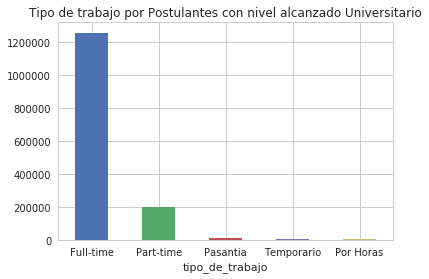

In [41]:
df_max_post_detalle[df_max_post_detalle["nombre"] == "Universitario"].groupby("tipo_de_trabajo")['idpostulante']\
.count().sort_values(ascending=False).head(5).plot(kind= 'bar', rot = 0, title = 'Tipo de trabajo por Postulantes con nivel alcanzado Universitario')

In [34]:
df_max_post_detalle[df_max_post_detalle["nombre"] == "Secundario"].groupby("nombre_area")['idpostulante']\
.count().sort_values(ascending=False).head(5)

nombre_area
Producción             184430
Ventas                 153568
Atención al Cliente     61964
Comercial               54218
Administración          51134
Name: idpostulante, dtype: int64

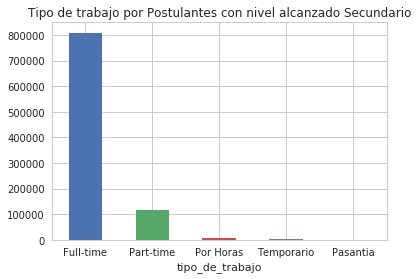

In [42]:
df_max_post_detalle[df_max_post_detalle["nombre"] == "Secundario"].groupby("tipo_de_trabajo")['idpostulante']\
.count().sort_values(ascending=False).head(5).plot(kind = 'bar', rot = 0, title='Tipo de trabajo por Postulantes con nivel alcanzado Secundario')